## Imports and useful funcs

In [56]:
runs_folder = 'Macro_Morgan_2_124_Res1'
comments = """learning rate 1e-4
                """




In [57]:
from torch.utils.data import DataLoader
from Solvation_1.my_nets.Create_dataset import *
from Solvation_1.Vectorizers.vectorizers import *
from Solvation_1.my_nets.LinearNet import *
from Solvation_1.my_nets.ResNET import  *
from Solvation_1.my_nets.net_func import *
import pickle

In [58]:
try:
    os.makedirs(project_path('Solvation_1/Runs/'+runs_folder))
except OSError as e:
    if e.errno != errno.EEXIST:
        raise

with open(project_path('Solvation_1/Runs/'+runs_folder+'/comments.txt'), 'w') as f:
    f.write(comments)

## Create dataset

In [59]:
table_v1 = pd.read_table(project_path('Solvation_1/Tables/SS_table_v3.tsv'))
dataset = SS_Dataset(table_v1, 'solvent_macro_props1', 'Morgan_fp_2_124', normalize=(True, False, True))
len_data = dataset.__len__()
val_data = len_data // 10
train_dataset, val_dataset = torch.utils.data.random_split(dataset, [len_data - val_data, val_data])

solvent_table = pd.read_table(project_path('Solvation_1/Tables/solvent_test_table_v3.tsv'))
solute_table = pd.read_table(project_path('Solvation_1/Tables/solute_test_table_v3.tsv'))
solvent_test_dataset = SS_Dataset(solvent_table, 'solvent_macro_props1', 'Morgan_fp_2_124', normalize=(True, False, True), show_norm_params=False)
solute_test_dataset = SS_Dataset(solute_table, 'solvent_macro_props1', 'Morgan_fp_2_124', normalize=(True, False, True), show_norm_params=False)

train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)

val_loader = DataLoader(val_dataset, batch_size=16, shuffle=False)

solvent_test_loader = DataLoader(solvent_test_dataset, batch_size=46, shuffle=False)
solute_test_loader = DataLoader(solute_test_dataset, batch_size=64, shuffle=False)

print(f'train length: {len(train_loader.dataset)}')
print(f'val length: {len(val_loader.dataset)}')
print(f'solute test length: {len(solute_test_loader.dataset)}')
print(f'solvent test length: {len(solvent_test_loader.dataset)}')

length check-> Solvent: 2529, Solute: 2529, G_solv: 2529
Solute
 std: tensor([0.3330, 0.1911, 0.3586, 0.4171, 0.3104, 0.4719, 0.1365, 0.1583, 0.1009,
        0.3074, 0.3119, 0.1583, 0.2463, 0.2184, 0.2385, 0.2991, 0.2518, 0.4333,
        0.1217, 0.4414, 0.1675, 0.2748, 0.2525, 0.2525, 0.1379, 0.1263, 0.2406,
        0.0908, 0.2325, 0.3928, 0.2699, 0.3412, 0.1882, 0.2248, 0.1217, 0.1248,
        0.1911, 0.1708, 0.2853, 0.1675, 0.1118, 0.1083, 0.1718, 0.4169, 0.2836,
        0.1510, 0.2904, 0.1772, 0.1629, 0.2333, 0.1782, 0.1446, 0.1559, 0.4729,
        0.1986, 0.4907, 0.1921, 0.1930, 0.3298, 0.2333, 0.3138, 0.1663, 0.4980,
        0.2109, 0.1522, 0.1485, 0.2176, 0.4260, 0.1606, 0.1729, 0.1729, 0.2498,
        0.0908, 0.2591, 0.4857, 0.1168, 0.4711, 0.3316, 0.1009, 0.1782, 0.1697,
        0.2399, 0.1185, 0.2385, 0.4992, 0.2456, 0.1351, 0.2754, 0.0949, 0.1497,
        0.1652, 0.2909, 0.1337, 0.2101, 0.2724, 0.1232, 0.1009, 0.2538, 0.1510,
        0.1337, 0.1433, 0.2975, 0.2058, 0.1595, 0.

## Training Network

In [61]:
x, y = next(iter(dataset))


In [62]:
x.shape

torch.Size([1, 131])

In [63]:
in_feat = next(iter(dataset))[0].shape[0]
verbose = False
model = ResNet1D(in_feat, base_filters=2, kernel_size=3, stride=2, groups=1, n_block=3, n_classes=1, use_bn=True, use_do=True, verbose=False)
loss_function = nn.MSELoss(reduction='sum')
optimizer = torch.optim.Adam(model.parameters(), lr=1e-4)

MSE = train(model,train_loader, val_loader, solvent_test_loader, solute_test_loader, loss_function, optimizer, epochs=10000, ckp_path=runs_folder)

epoch 0: val loss (1e+16 -> 0.6753350496292114). Saving model
epoch 5: val loss (0.6753350496292114 -> 0.6467844843864441). Saving model
epoch 10: val loss (0.6467844843864441 -> 0.6242907047271729). Saving model
epoch 15: val loss (0.6242907047271729 -> 0.59610915184021). Saving model
epoch 20: val loss (0.59610915184021 -> 0.5838038921356201). Saving model
epoch 25: val loss (0.5838038921356201 -> 0.5646820068359375). Saving model
epoch 30: val loss (0.5646820068359375 -> 0.5518521666526794). Saving model
epoch 35: val loss (0.5518521666526794 -> 0.5370844006538391). Saving model
epoch 40: val loss (0.5370844006538391 -> 0.5286998152732849). Saving model
epoch 45: val loss (0.5286998152732849 -> 0.5162407755851746). Saving model
epoch 50: val loss (0.5162407755851746 -> 0.5103851556777954). Saving model
epoch 55: val loss (0.5103851556777954 -> 0.500345766544342). Saving model
epoch 60: val loss (0.500345766544342 -> 0.49636316299438477). Saving model
epoch 65: val loss (0.4963631629

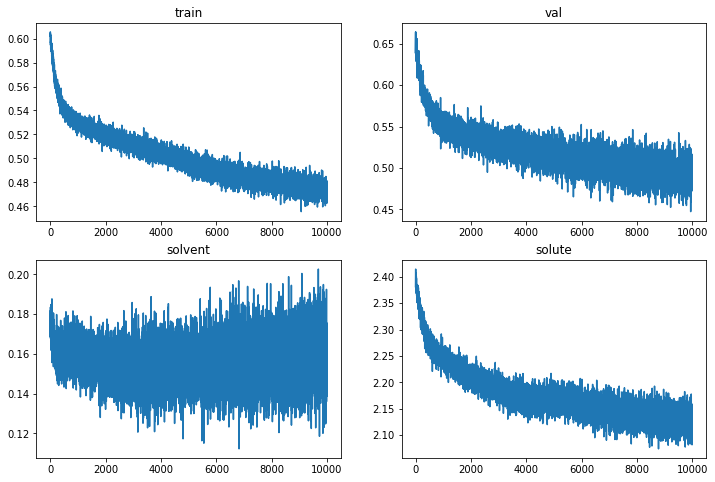

In [7]:
plot_losses(project_path('Solvation_1/Runs/'+runs_folder+'/run_log.tsv'))